# 결정 트리 과적합
- Decision TREE Overfitting

In [4]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
x_features, y_labels = make_classification(n_features=2, 
                                           n_redundant=0, 
                                           n_informative=2,
                                           n_classes=3, 
                                           n_clusters_per_class=1,
                                           random_state=0)

In [5]:
x_features.shape

(100, 2)

In [6]:
y_labels

array([0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0,
       1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0])

In [7]:
import numpy as np

np.unique(y_labels)

array([0, 1, 2])

In [8]:
# 유일값 개수
np.unique(y_labels, return_counts=True)

(array([0, 1, 2]), array([34, 33, 33], dtype=int64))

In [9]:
# 유일값 개수 : dict
type(np.unique(y_labels, return_counts=True))  # tuple

unique, counts = np.unique(y_labels, return_counts=True)
dict(zip(unique, counts))

{0: 34, 1: 33, 2: 33}

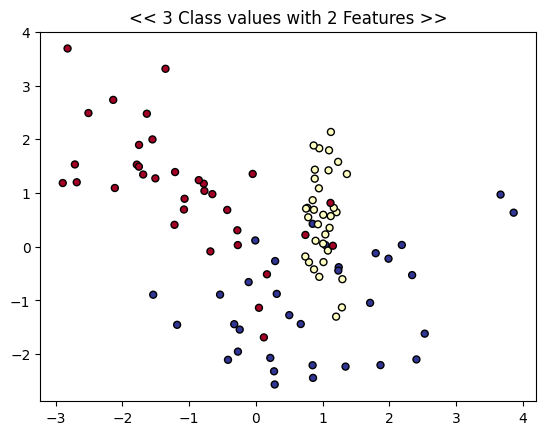

In [10]:
## [시각화] 2차원 ##############################################
## feature : 2
## class : 3 (클래스 색은 다르게)
plt.title('<< 3 Class values with 2 Features >>')

plt.scatter(x_features[:, 0], ## x축 : X_features 모든 행, 첫 번째 열
            x_features[:, 1], ## y축 : X_features 모든 행, 두 번째 열
            marker='o', 
            c=y_labels, 
            s=25, 
            #cmap='rainbow', 
            cmap='RdYlBu',
            edgecolor='k')

In [13]:
import numpy as np

## Classifier의 Decision Boundary 시각화
def visualize_boundary(model, x, y):
    fig,ax = plt.subplots()
    
    ## 학습 데이터 scatter plot으로 표현
    ax.scatter(x[:, 0], x[:, 1], c=y, s=25, 
               #cmap='rainbow', 
               cmap='RdYlBu',
               edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    ## 학습
    model.fit(x, y)
    
    ## 예측 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    ## contourf() : class boundary visualization
    n_classes = len(np.unique(y))
    
    contours = ax.contourf(xx, 
                           yy, 
                           z, 
                           alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           #cmap='rainbow', 
                           cmap='RdYlBu',
                           #clim=(y.min(), y.max()),
                           zorder=1)

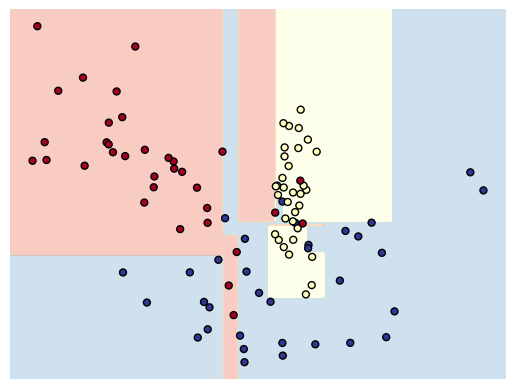

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=11)

visualize_boundary(dt_clf, x_features, y_labels)

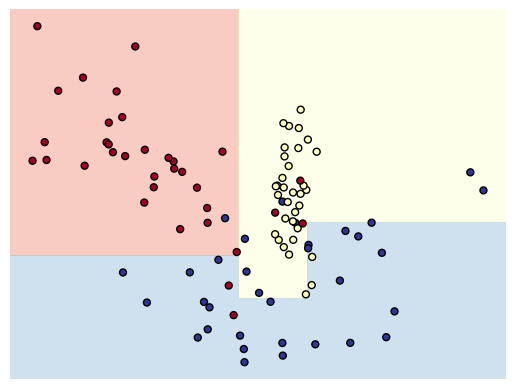

In [15]:
## Hyperparameter 설정
## : min_samples_leaf=6
dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf=6)
visualize_boundary(dt_clf, x_features, y_labels)

In [15]:
dt_clf.get_depth()

5

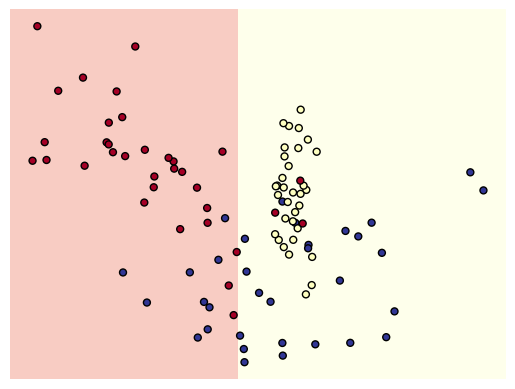

In [16]:
## Hyperparameter 설정
## : max_depth=1
dt_clf = DecisionTreeClassifier(random_state=11, max_depth=1)
visualize_boundary(dt_clf, x_features, y_labels)

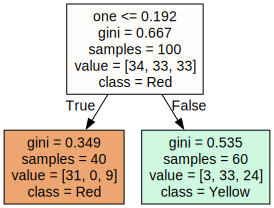

In [18]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, 
                out_file='tree_overfitting.dot', 
                class_names=['Red', 'Yellow', 'Blue'], 
                feature_names=['one', 'two'], 
                filled=True,
               )

with open('tree_overfitting.dot') as file:
    graph = file.read()
    
graphviz.Source(graph)

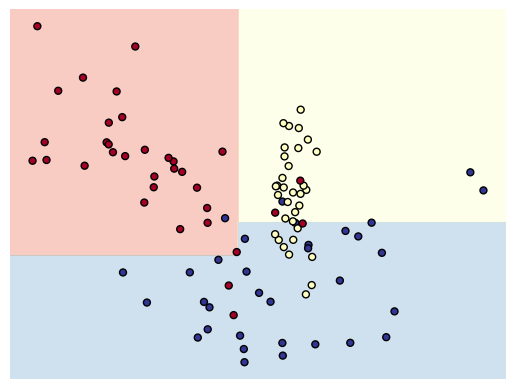

In [19]:
## Hyperparameter 설정
## : max_depth=1
dt_clf = DecisionTreeClassifier(random_state=11, max_depth=2)
visualize_boundary(dt_clf, x_features, y_labels)

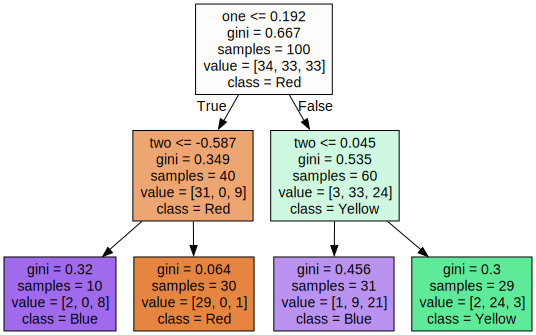

In [20]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, 
                out_file='tree_overfitting.dot', 
                class_names=['Red', 'Yellow', 'Blue'], 
                feature_names=['one', 'two'], 
                filled=True,
               )

with open('tree_overfitting.dot') as file:
    graph = file.read()
    
graphviz.Source(graph)